<img src=https://hiverhq.com/blog/wp-content/uploads/2016/01/AB-Testing.jpg width=500>

Inference
---------

This morning we look at significance testing, first by examining how it appears in "the literature" today and then we retreat to the very first test. It was a biggie - a question of divine intervention. It might seem antique, but there's something very simple to hold onto in this example. 

Along the way we will learn a little more R. As I've said before, you can think of R as being driven by "verbs". We have seen read.csv() and table() and hist(), for example. We add other verbs to the "base R" by installing and loading "packages". One that we have found important so far is called "dplyr" and is by Hadley Wickham. Packages introduce new data and new verbs into the language. We've seen some of these new verbs for dplyr already and we'll see a couple more below.

In each case, **the functions take a table (a data frame) as input and return another, altered data frame as output.** These functions let you specify subsets, sort on columns, and create new columns. But in each case, you give a table and you get a table. Here are four that we will use today. Probably by the time we're done with our 5th session, we'll have 15 verbs or so. Not bad!

- filter() to keep only certain rows in a table
- arrange() to sort the rows of a table according to one or more variables
- select() to keep only certain columns in a table
- mutate() to add columns to a table

To load a package and make use of the new verbs, we use the command library().

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



**Birth and the First Significance Test**

**Reviewing the data graphically.** Let's start with the data from Arbuthnot  on christenings. We read it directly from our github account, or you can use the URL below, download the data to the same folder your notebook is in and then use `read.csv("arbuthnot.csv")`. This will get you a list, by year, of the numbers of boys and girls christened in England. 

In [2]:
ar <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/arbuthnot.csv")
head(ar)

year,boys,girls
1629,5218,4683
1630,4858,4457
1631,4422,4102
1632,4994,4590
1633,5158,4839
1634,5035,4820


Make a line plot of the girls born each year and then change the code to plot just the boys. The argument changes it from a point plot ("type" is "p") to a line plot, with "l". R makes all the choices for you about axes ranges and where the axis labels should go. Although in the next cell we'll see how to play with that.

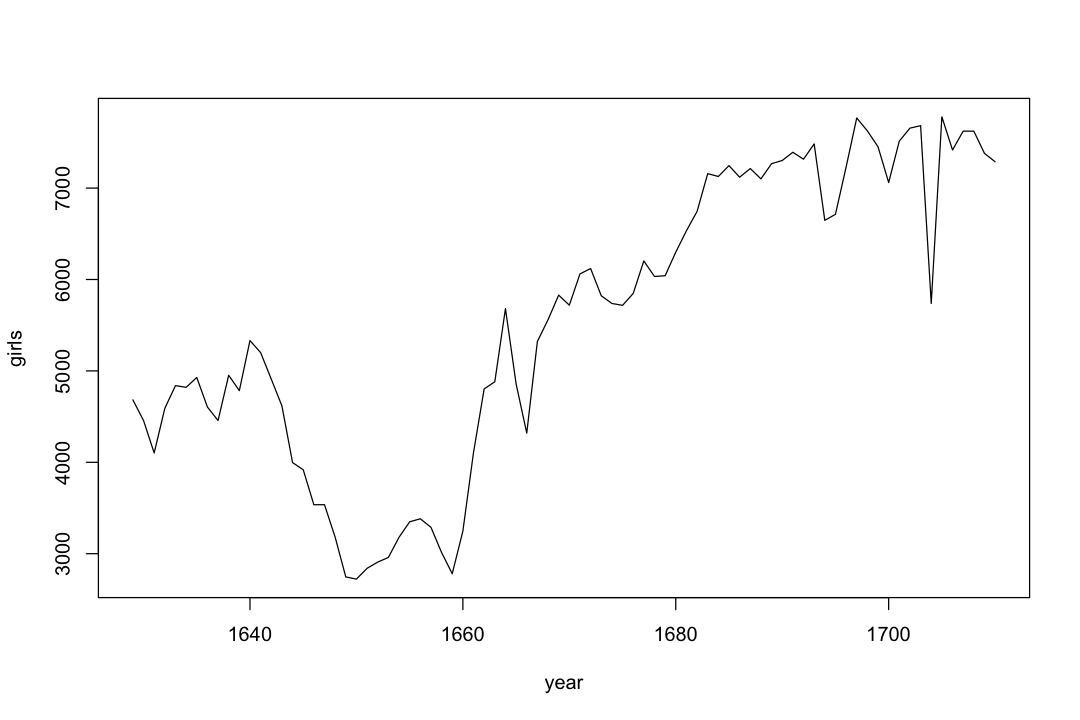

In [3]:
# Adjust the size of the plot -- 9 inches wide, 6 tall
options(repr.plot.width=9, repr.plot.height=6)

plot(girls~year,data=ar,type="l")

R uses what's called a "painters model" when creating graphics. They are built up in layers. Here we add a dotted lines for boys' christenings. We added some bells and whistles to the plot command to show you the kinds of arguments you can include. 

The "xlab" and "ylab" are for x- and y-axis labels (should you want to replace them), "main" puts text at the top of the plot. The "ylim" parameter lets you specify two numbers (in a vector) that represent the low and high values of the y-axis and "xlim" would do the same for the x. 

In the final plot we use abline() (which we saw adding a line to the top of a scatter plot before) to add a vertical line at the year 1704. You can also draw "v=" vertical lines, and specify both "a=" and "b=" for the intercept and slope of a trend line, say. 

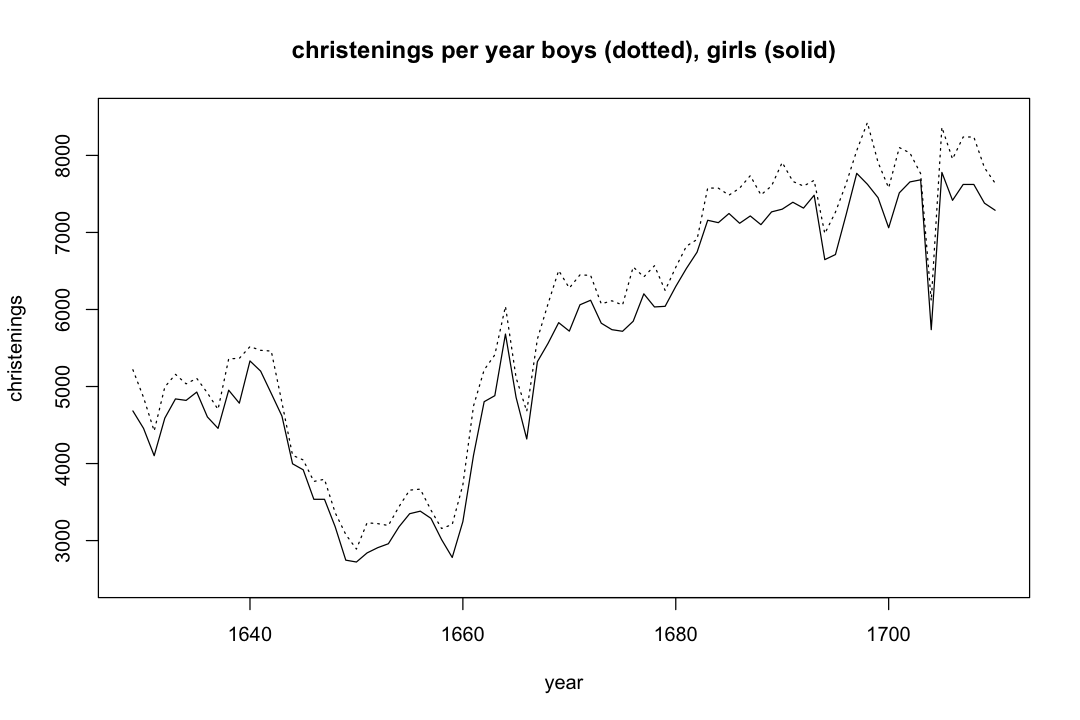

In [4]:
plot(girls~year,data=ar,type="l",ylab="christenings",xlab="year",main="christenings per year boys (dotted), girls (solid)",ylim=c(2500,8500))
lines(boys~year,data=ar,lty="dotted")

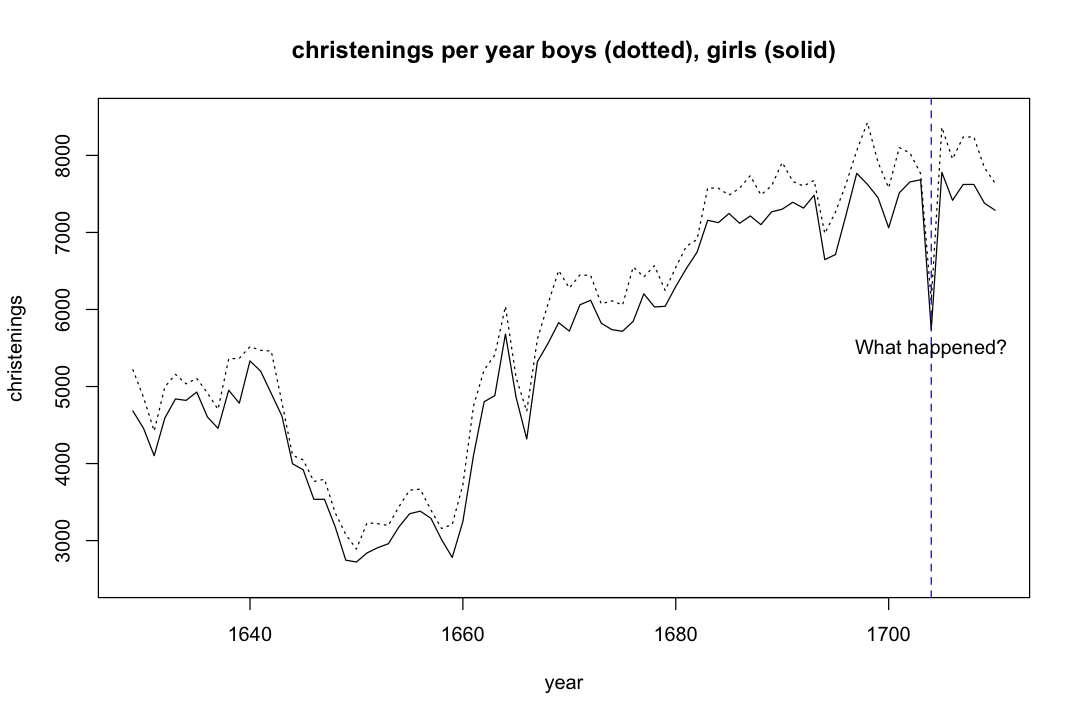

In [5]:
plot(girls~year,data=ar,type="l",ylab="christenings",xlab="year",main="christenings per year boys (dotted), girls (solid)",ylim=c(2500,8500))
lines(boys~year,data=ar,lty="dotted")
abline(v=1704,lty="dashed",col="blue")
text(1704,5500,"What happened?")

Moving from graphics to more data operations. We have seen tools to filter() rows from a table, to select() columns from a table and now, we are going to use a command called mutate() to add columns to a table based on other columns in the table.

Here we create a column called "children" which is just the sum of the boys and girls counts. We store the resulting table (with four columns now and not just three) back under the name of the original variable "ar", replacing what we had before. 

In [6]:
ar <- mutate(ar,children=boys+girls)
head(ar)

year,boys,girls,children
1629,5218,4683,9901
1630,4858,4457,9315
1631,4422,4102,8524
1632,4994,4590,9584
1633,5158,4839,9997
1634,5035,4820,9855


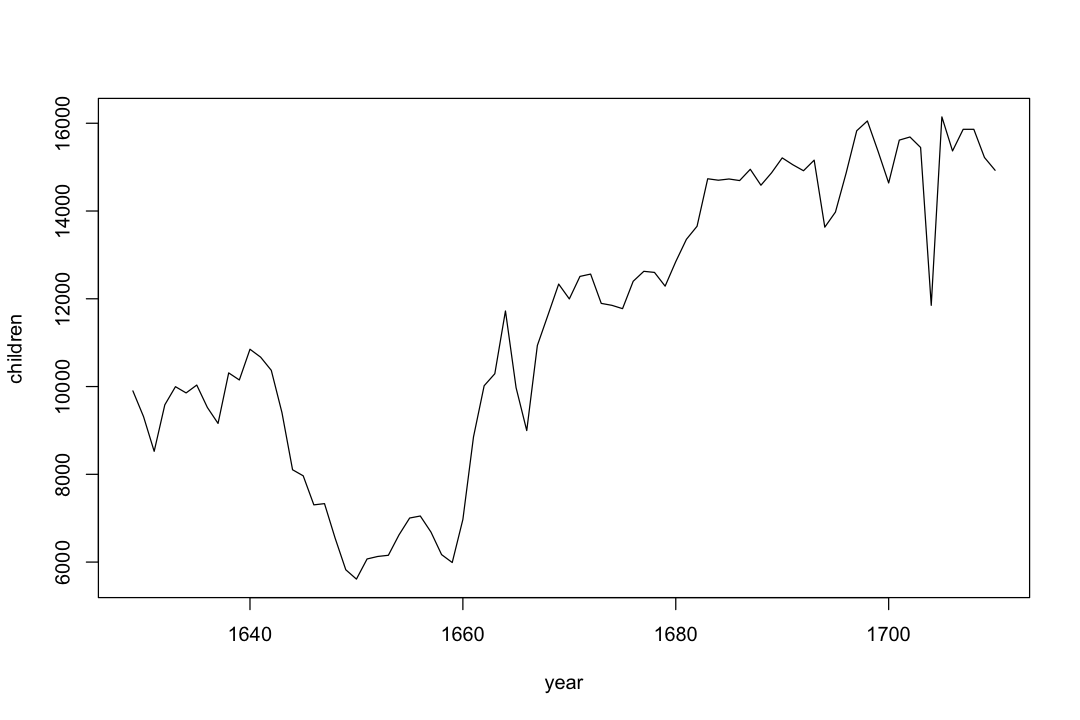

In [7]:
plot(children~year,data=ar,type="l")

**Simple simulations.** R is a big calculator. R is also a random number generator. For today we need it's ability to draw tickets out of a hat. Yeah, that feels obscure, but it's one way olde tyme simulation used to be done. Put names in a hat, mix them up and pull them out one at a time. 

R's command for this is called sample(). You give it a couple arguments. The first is a vector of items that should go in the hat (maybe things you'd like to write on tickets that you then put in a hat or a fishbowl or... this is getting silly). Then you give it the number of draws you'd like to make. So below, our vector is c("H","T") for heads and tails. The second argument is 1, meaning we want to pull one item, the "H" or the "T". The chance of pulling either is 0.5.

(Since this is an exercise about Arbuthnot and we have been talking about tossing coins, you should probably convince yourself that drawing an "H" or a "T" at random from a hat is the same thing as thinking about tossing a coin that lands heads or tails, each with probability 0.5.)

Execute the code below a few times and watch the result change.

In [8]:
sample(c("H","T"),1)

[1] "T"

Arbuthnot needed to compare his data to what would happen if we tossed a fair coin 82 times. That means 82 draws from our hat. So we replace the 1 with 82 in the code we've been using.

Ah but there's a small catch. To really be like a coin toss each time, we have to put back whatever we took from the hat. It's called "sampling with replacement". It's counterpart, "sampling without replacement" means we just keep pulling things from the hat until it's empty. 

In our we put an "H" and a "T" in a hat. We pull one out, record what it was and then put it back in the hat. We then choose again. We do this 82 times. 

Exercise the code below and see how things change.

In [9]:
sample(c("H","T"),82,replace=TRUE)

[1] "H" "T" "H" "T" "H" "H" "T" "H" "T" "H" "H" "H" "T" "T" "H" "T" "T" "H" "T"
[20] "H" "H" "T" "T" "T" "T" "T" "H" "T" "H" "H" "T" "T" "T" "T" "T" "T" "H" "T"
[39] "T" "T" "H" "T" "T" "H" "T" "H" "T" "T" "H" "H" "T" "T" "T" "H" "H" "H" "T"
[58] "H" "T" "T" "H" "T" "T" "H" "T" "T" "T" "T" "H" "T" "H" "H" "H" "T" "H" "T"
[77] "T" "H" "T" "H" "H" "H"

We can use a "logical operator" to ask which of these are heads and which are tails. The "==" sign basically asks each of the 82 elements if it's an "H" or not. 

In [10]:
sample(c("H","T"),82,replace=TRUE) == "H"

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[13] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[37] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[49] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[61]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[73] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE

This will change every time you exercise the code. As an aside, there are lots of other logical operators. Suppose we create a vector of numbers. We can then ask not just about equality, "==", but also less-than, less-than-or-equal-to, etc. Below we create a variable "test" that has 7 numbers in it. We then use a few of the logical expressions. In all we have
> &nbsp;\> : greater than
<br>
\>= : greater than or equal to
<br>
 &nbsp;< : less than
<br>
<= : less than or equal to
<br>
== : equal to
<br>
!= : not equal to


In [ ]:
test <- c(5,3,7,9,10,1,2)
test > 5

In [ ]:
test != 7

Finally, we can sum() the logical data that came back from our coin tosses. Summing them will tell us how many "H"'s we had. Why does this work? When computing with logical variables (TRUE and FALSE), R will turn TRUE to 1 and FALSE to 0. That includes  when you do simple arithmetic on them like taking a sum. 

Exercise the code a few times to see the counts change.

In [ ]:
sum(sample(c("H","T"),82,replace=TRUE) == "H")

Finally, we will create a vector made up of repeating the number 0 10,000 times. We then create a little "loop" that operates 10,000 times, each time creating one set of 82 trials and counting up how many H's we got.

The loop is a bit of a high-minded construction and we don't really need it, but it makes it really clear what we are doing. The "1:10000" is shorthand to create a vector consisting of the numbers 1, 2, 3, ..., 9999, 10000. In the loop the variable "i" will take on each of these values in succession. First pass throug the loop is like setting "i <- 1". In the second pass, "i <- 2" and in the last pass "i <- 10000". 

Inside the body of the loop (the commands in the curly braces) we are creating a sample of coin tosses and counting up the number of heads or "H"'s. That number is stored in the ith entry of our vector "tosses" that we created by repeating, rep(), the value zero 10000 times. 

So, we are asking R to repeat an experiment 10000 times. Each experiment consist of 82 fair coin tosses (50/50 for "H" or "T"). We then end up with a vector called "tosses" that records the results of these experiments. Each entry is a count. The group of them is an approximation for our "null distribution", what we expect to see if the null hypothesis is true.

In [ ]:
tosses <- rep(0,10000)

for(i in 1:10000){
    tosses[i] <- sum(sample(c("H","T"),82,replace=TRUE) == "H")
}

... and the histogram. This is our null distribution for Arbuthnot's hypothesis. Notice we used "xlim" to make sure we extended the range of the x-axis all the way out to Arbuthnot's data.

In [ ]:
hist(tosses,xlim=c(0,82))

There are some things to notice about this distribution. First, just look at it! It's a lovely bell shape. There's a reason why statisticians were so wild about the bell curve. There's something called the Central Limit Theorem, which, used in this context suggests that tossing our 82 coins produces counts that look like a normal distribution. 

It's a powerful effect. If we can assume our sampling distribution looks like a bell curve, we can compute (at least approximately) the chance of different possible outcomes. For that reason, we will see bell curves popping up all over when we look at null distributions. Mathematical statistics depends on it. 

The other thing to notice is that Arbuthnot's value of 82 is really so far away from the mass of the distribution that it's really rare for someone to actually toss 82 coins. So we're left with one of two things being true. 

> Either there's something wrong with our assumption that boys and girls are born in equal proportions, or 
<br><br>
boys and girls really are born in equal proportion but an incredibly rare thing happened during those years in England, incredibly rare, super-mega-ultra-lotto winning rare

So what do you do? Do you take Arbuthnot's observation of 82 as evidence against the null hypothesis or do you hold onto it, believing something rare has happened (I mean rare things do happen)? I'd feel more than comfortable thinking there was something wrong with our null assumption and start to look for signs of this effect elsewhere (while perhaps pulling back a bit from answering whether or not this was divine intervention).

<img src=https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2015/11/07/BirthRateCHART1edit-01_0.png width=400>

This gives you the structure of statistical reasoning as made rigorous by Ronald Fisher. Again, the ingredients are as follows.

>We establish a **null hypothesis**, plausible statement (a model or scenario) which might explain some pattern in a given set of data. This hypothesis is made for the purposes of argument — a good null hypothesis is a statement that would be interesting to reject. Think of it as a kind of devil’s advocate (or maybe straw man is a better reference as the test was about divine intervention, after all).
<br><br>
We then define a **test statistic**, some quantity calculated from our data that is used to evaluate how compatible the results are with those expected under the null hypothesis (if the hypothesized statement - or model or scenario - was true)
<br><br>
We then simulate the values of the test statistic using the null hypothesis. In our analysis of Arbuthnot’s hypothesis, that meant simulating a series of data sets assuming the null hypothesis is true and there is a 50/50 chance of boys outnumbering girls in a given year. For each data set we compute the test statistic. The ensemble of simulated test statistics is often called a **null distribution.**
<br><br>
Finally, we compare the value of the test statistic we computed for our data to the values we obtained by simulation — If they are very different, we have evidence that the null hypothesis is wrong. The chance that we see a value of the test statistic in simulations as or more extreme than what we computed from our data is referred to as the **P-value of the test**.

**A little math.** Before we leave this example, there is an easier way simulate coin tosses using the "binomial distribution." This describes the count of the number of successes in n repeated trials, when the chance of success in each is p. 

The mean of the binomial can be worked out mathematially to be np and its standard deviation is $\sqrt{np(1-p)}$. So for p=0.5 and n=82, we have a mean of 41 and a standard deviation of 4.5. If we remember our normal calculations, given that the distribution looks like a bell curve, we expect about 95% of it should be between +/- two standard deviations of the mean. That is 41 +/- 9 or between 32 and 50. 

In [ ]:
hist(tosses,xlim=c(0,82))
abline(v=c(32,50),lty="dotted")

To test out the approximation, we can ask how many of our trials had 32 or fewer successes and how many had 50 or more successes. We can join two logical operators with "&" for "and" and "|" for "or". Here we want either condition so we use an "or".

In [ ]:
sum(tosses>=50 | tosses <= 32)

In my run, that was 570 out of 10000 or 5.7%, close to the 5% we expected using our normal rule of thumb. Your results will be a little different, but you should get reasonably close to 5%. Reasoning in this way, we can come up with quick and dirty assesments about the statistical significance of a null hypothesis. 

Anyway, I chose to swap a little math for a little computing. Either way, we see that Arbuthnot's value of 82 is very rare. It doesn't even show up in 10,000 simulations! Plenty of evidence to "reject" this null hypothesis. 

**Clinical Trials**

Our second example of hypotheis testing came from Bradford Hill. His TB trial data (or a creative reproduciton of it) is on our github account.

In [ ]:
hill <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/hill.csv")
head(hill)

We can make the table we've been looking at in slides with a table() command.

In [ ]:
table(hill)

Again, we see that 14/52 died on the control whereas only 5/55 died on penicillin. That seems pretty good, but could this be the result of randomness? That is, could we have seen these results simply by chance?

The chance mechanism at work here is **the randomization into penicillin or control**, something Hill advocated to prevent physician bias, and Fisher argued was the soul of the statistical enterprise. Randomization gives us a yardstick to measure the significance of an event against. 

Walking through our testing steps, we need a **null hypothesis** or "straw man". The one in play here is the assumption that both the control and penicillin are essential the same when it comes to treating TB. For example, the people who died on in the control group would have died if they received penicillin, and those who survived under penicillin would have also survived if they were simply given bedrest, the control.

>Under the null hypothesis, each person's outcome, whether they lived or died, would have been the same no matter whether they received penicillin or bed rest. That's our straw man, our devil's advocate. 

So reasoning under the null, everything in that table was the result of randomization. You can imagine that Hill had a total of 107 people, 18 of whom were destined to die no matter what treatment he gave them. By pure luck, fewer people who ultimately died of TB landed in the penicillin group. We could then take as **our test statistic** the number of people who died in the penicillin group and ask how often does randomization produce a table where 4 people or fewer die while receiving penicillin? 

*If that is a pretty common occurrence*, then we would say that the data don't seem inconsistent with the null and we would think about what happened and whether penicillin is as beneficial as we thought. *If it is an uncommon occurrence*, we could take it as evidence that our null hypothesis is wrong, that the two treatments are not the same. 

To create our null distribution, let's try rerandomizing people into penicillin or bed rest, since under the null hypothesis no matter what treatment we gave them they would have lived or died just as they did in Hill's study.

In the code below, we copy the data set "hill" and make a new, identical data frame (first cell). We then take the treatment column and replace it with a mixed up version of the original (second cell). That is, we put all the treatments in a hat (55 "control" and 57 "penicillin") and draw them out one at a time, assigning or reassigning them one-by-one to the patients. **Each of the 107 patients is re-randomized.** The defaults for sample() are to draw everything from the hat without replacement. Recall we changed it's behavior to make it like tossing coins with the "replace=TRUE" argument.

And because the null hypothesis assumes these two treatments performing identically, the patients would have lived or died exactly as they did in Hill's table. Hence we have repeated his experiment with a different randomization. **So, let's look at some of the experiments that Hill didn't run, but are equally legit under the null.**

Exercise the code below a few times. You only have to do the first cell once, and then just overwrite the treatment column over and over.

In [ ]:
newhill <- hill

In [ ]:
# do this a few times and watch the count of people in the "died"-"penicillin" cell

newhill$treatment <- sample(hill$treatment)
table(newhill)

What do you see? The table bounces around a bit. Let's start keeping track of how many people die on penicillin each time we do this. And make a histogram of the null distribution as before.

In [ ]:
newtrials <- rep(0,10000)

for(i in 1:10000){
    newhill$treatment <- sample(hill$treatment)
    newtrials[i] <- sum(newhill$outcome=="died" & newhill$treatment=="penicillin")
}

In [ ]:
hist(newtrials)

What do you notice? How likely are we to see a 4 or fewer deaths from penicilin just by chance? That is, under the null hypothesis, how likely is a table that is as or more extreme in favor of penicillin than the one we saw?

In [ ]:
sum(newtrials<=4)

In my case 59 out of 10,000, or 0.0059, or about 0.6% had counts as low or lower than what Hill saw, for a P-value of 0.0059. What do you think? Does this provide evidence that our null hypothesis is wrong? What you immediately start to look for is some kind of color coding telling you when the strength of evidence is sufficient to "reject" the null hypothesis, something to be a warning that the hypothesis is in danger...

<img src=http://www.bigislandvideonews.com/wp-content/uploads/2015/09/2015-09-18alertlevels.jpg width=300>

... something to help you feel more confident in your determination, having looked at the data.

<img src=http://images.linnlive.com/7e2bc948603fd0f7a1d09242f6eb618f/ccc3edb7-a38c-4e6c-96ba-f036bbe9d1e3.jpg width=400>

This is where our discussion came into play. You don't take it seriously until the P-value is not microscopically small. Then the errors built into this come into play. For 60 or so times out of 10,000 **under the null hypothesis of no difference, you get a table, just by chance, that makes penicillin look really good.** If you reject the null hypothesis then you might be putting faith in penicillin when none is warranted. How small should a P-value be for you to feel comfortable that you're not making a mistake?

For academic publishing, a cutoff of 0.05 is typical. Any P-value below 0.05 is said to be "statistically significant." Significance means, typically, that a paper can get published, the researcher having found an "important" result. 

And that's part of the issue with significance testing. Fisher meant it to be something that one consulted for evidence, but you had a lifetime of experience as well to draw on. It's why he could make a cavalier comment about 0.05 being comfortable to him because it meant that with this as a cutoff, you'll only incorrectly rejecting a null hypothesis 1 in 20 times - an error rate he said he could live with. But again, he wasn't a stickler for these rules and actively fought against them.

There is also a real difference between statistical significance and practical significance. We'll see that more clearly when we cover confidence intervals.

The P-vaue has held sway in academic publishing for quite some time, but recently there has been a move to do something about it, to replace it with more meaningful measures. [Here is a nice Vox article](https://www.vox.com/science-and-health/2017/7/31/16021654/p-values-statistical-significance-redefine-0005) that summarizes the trouble with P-values. It's worth a read.

**A/B Testing**

The mechanism behind randomized trials is underneath a host of processes that are optimizing headlines, moving content around on home pages, and testing out what kind of content is pushed out to social media. [Have a read about what Buzzfeed does.](https://ijnet.org/en/blog/adaptation-ab-testing-and-analytics-how-buzzfeed-optimizes-news-its-audience) We are now going to load up the data given to us by the New York Times. [Pull it from Dropbox](https://www.dropbox.com/s/x8ud9taqg12s7c4/nyt.csv?dl=0) and place it in the same folder as your notebook. It's a little old now, but the principles are the same. (It was too big for github.)

The treatment, you will recall, was replacing a Tab layout versus a List layout for the top cities and most e-mailed stories. Again, this was an old version of the site. The treatment is stored in a variable called "Variation" (which page variation were people shown) and "IfClicked" (did they click or not). Read in the data and then have a look.

In [ ]:
nyt <- read.csv("nyt.csv")
head(nyt)

The variables above include the following.

> User_ID - A unique number for each visitor
<br> UserVisit_ID - A unique number for each visit
<br> StartTime_SSE - UNIX time for the start of the visit
<br> StartTime_English - A more humanly readable version of the time
<br> VisitLength - The number of seconds the visitor was reading the Travel Section pages
<br> Variation - The version of the page they received
<br> RefererURL - The page they clicked on to get to the Travel Section (if any)
<br> EntryPageUrl - The first page on nytimes.com they visited
<br> Pageviews - The number of pages viewed in the Travel Section
<br> TotalVisits - The total number of visits to the site
<br> TimeSinceFirstVisit (days) - How long had it been since their first visit
<br> UserAgent - Their browser
<br> TotalClicks - How many times did they ckick on the "most popular" field
<br> IfClicked - 0/1 did they click on the "most popular" field at least once

This data set was collected in 2008 (sadly) and even then you get an idea for how much information sites have to help adapt content. A/B testing is just one strategy. There is plenty here to build up kind of profile of your viewing habits.

Here is how you make a table from just "Variation" and "IfClicked" using the funciton select() that only keeps the named columns from "nyt". So, what does this say?

In [ ]:
table(select(nyt,Variation,IfClicked))

Following how we proceeded with Hill's data, we can make a copy of the data set and then shuffle the treatment column, under the null hypothesis that both Tabs and Lists encourage people to click on the "most popular" field equally. Let's have a look at a few simulated tables and get a sense of how likely, say, having 1200 people who saw Tabs click on the field. Is it rare, suggesting the null hypothesis is wrong; or is it consistent with the null distribution?

In [ ]:
newnyt <- nyt

In [ ]:
# do this a few times and watch the count of people in the "died"-"penicillin" cell

newnyt$Variation <- sample(nyt$Variation)
table(select(newnyt,Variation,IfClicked))

Because this data set is big (130k rows), we will only simulate 1000 times. The results are clear enough even with this smaller number.

In [ ]:
newtrials <- rep(0,1000)

for(i in 1:1000){
    newnyt$Variation <- sample(nyt$Variation)
    newtrials[i] <- sum(newnyt$Variation=="Tabs" & newnyt$IfClicked==1)
}

In [ ]:
hist(newtrials)

What do you think?

So far we have played a little fast and loose with some of the technicalities and we can give you more resources on how testing works, but you get the spirit. In later incarnations, competing camps tried to firm up significance testing by casting it as a decision problem. Hypothesis testing was developed by Jerzy Neyman and Egon Pearson and involves not only a null hypothesis but also an alternative. 

Neyman and Pearson talk specifically about errors you can make in this testing process (rejecting a true null hypothesis or failing to reject a false null hypothesis, say). By accounting for these two errors (called Type I and Type II), they provided tools for researchers to balance the kinds of mistakes they might make. But there's no new magic here - in fact Neyman and Pearson decided that these rules were important because in their estimation, you really couldn't learn anything from data. You could only behave in ways that protected you from making mistakes. It was a kind of behavioral induction.

Next time, we will look at confidence intervals (margins of error), starting with [things like these](https://projects.fivethirtyeight.com/trump-approval-ratings/).